# import all needed dependencies

In [1]:
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

# data preperation

In [2]:
df_train = pd.read_csv('../churn_prediction_data/train.csv')
df_test = pd.read_csv('../churn_prediction_data/test.csv')

## checking if there are any missing data on both `df_train` & `df_test`

(<AxesSubplot:>, <AxesSubplot:>)

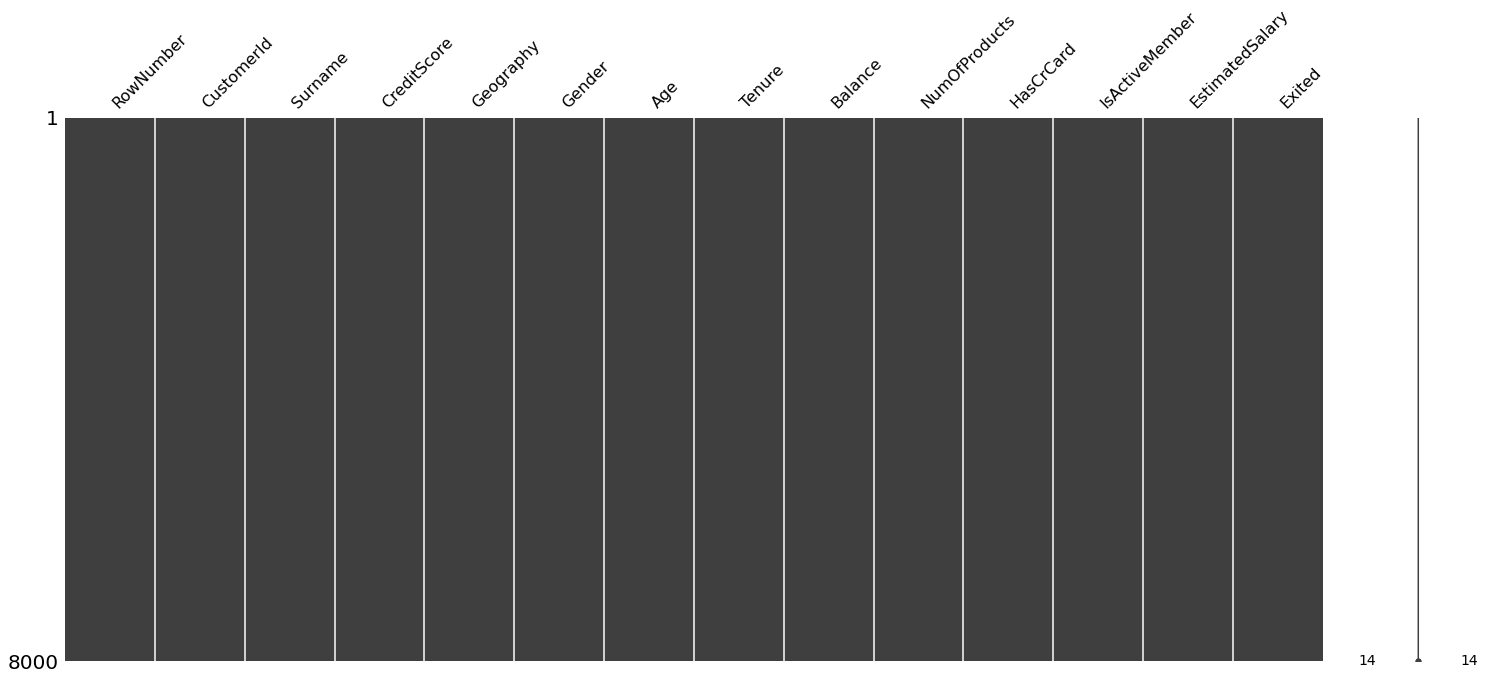

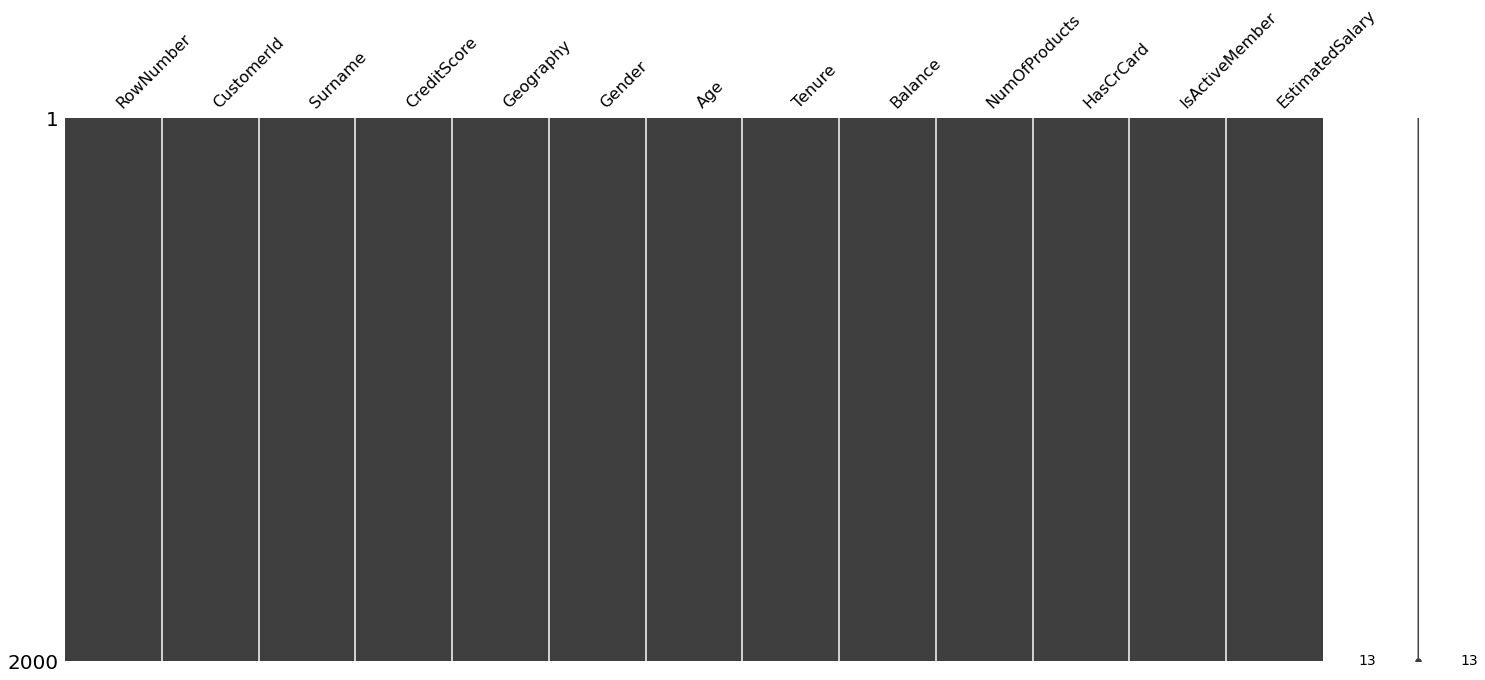

In [3]:
msn.matrix(df_train), msn.matrix(df_test)

## take a look at the data

In [4]:
df_train.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0


In [5]:
df_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5001.026625,1.569089e+07,630.804875,42.988125,4.567375,100569.286116,1.534250,0.702750,0.516875,100103.554906,0.204000
std,2879.566761,7.187306e+04,59.076984,7.515870,1.272758,31431.771836,0.582554,0.457076,0.499746,24511.460933,0.402994
min,1.000000,1.556571e+07,446.000000,28.000000,2.000000,62397.410000,1.000000,0.000000,0.000000,57522.070000,0.000000
25%,2500.750000,1.562882e+07,590.000000,38.000000,4.000000,62397.410000,1.000000,0.000000,0.000000,79216.925000,0.000000
50%,5014.000000,1.569017e+07,631.000000,42.000000,5.000000,111118.600000,1.000000,1.000000,1.000000,100056.110000,0.000000
75%,7474.250000,1.575398e+07,672.000000,47.000000,6.000000,126500.100000,2.000000,1.000000,1.000000,121104.542500,0.000000
max,9999.000000,1.581569e+07,753.000000,81.000000,7.000000,188500.680000,4.000000,1.000000,1.000000,142481.990000,1.000000


In [6]:
df_test.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2209,15623595,Scott,726,France,Female,39,3,62397.41,1,0,0,106139.31
1,9924,15740283,Yegorova,661,France,Male,42,3,130339.64,1,1,0,125776.38
2,4617,15802368,Tan,545,France,Male,34,6,62397.41,2,1,1,78372.28


In [7]:
df_test.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,4998.393500,1.569115e+07,629.245500,42.852500,4.523500,101921.825550,1.514000,0.71650,0.508000,99783.305845
std,2916.751868,7.220576e+04,60.141514,7.578751,1.246686,31062.598395,0.577902,0.45081,0.500061,24119.788095
min,2.000000,1.556570e+07,446.000000,28.000000,2.000000,62397.410000,1.000000,0.00000,0.000000,57617.610000
25%,2502.250000,1.562800e+07,587.000000,38.000000,3.000000,62397.410000,1.000000,0.00000,0.000000,79097.190000
50%,4934.500000,1.569412e+07,631.000000,42.000000,5.000000,111929.630000,1.000000,1.00000,1.000000,100351.975000
75%,7607.250000,1.575106e+07,671.000000,47.000000,5.000000,126892.880000,2.000000,1.00000,1.000000,120108.617500
max,10000.000000,1.581566e+07,753.000000,78.000000,7.000000,174110.800000,4.000000,1.00000,1.000000,142368.520000


In [8]:
#df_train.drop('Gender', inplace=True, axis=1)
df_train['Gender'] = df_train['Gender'].replace({'Male': 0, 'Female': 1})
df_train.drop('Geography', inplace=True, axis=1)

In [9]:
train_data = df_train.loc[:, 'CreditScore': 'EstimatedSalary']
test_data = df_test.loc[:, 'CreditScore': 'EstimatedSalary']

## heatmap on features of train & test data

Text(0.5, 1.0, 'x_test')

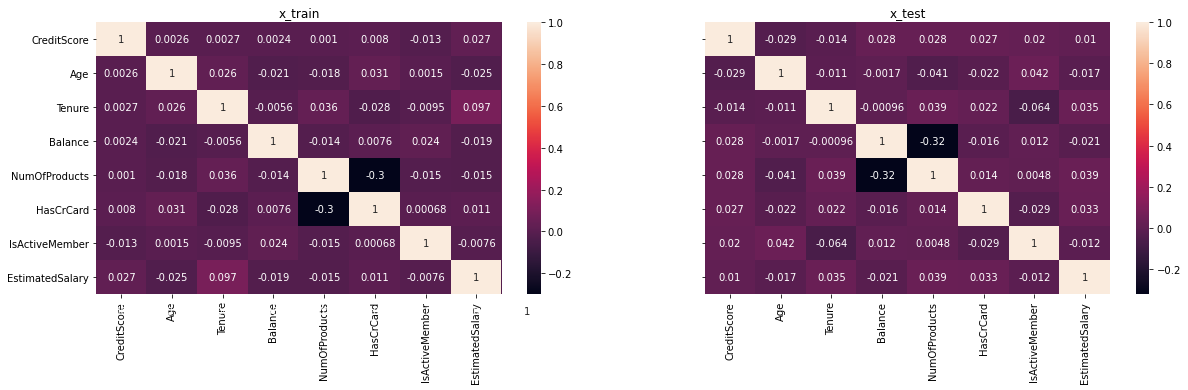

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True, sharey=True)
#fig.suptitle('')

sns.heatmap(train_data.corr(), ax=axes[0], annot=True)
axes[0].set_title('x_train')

sns.heatmap(test_data.corr(), ax=axes[1], annot=True)
axes[1].set_title('x_test')

## checking label distribution on training data

In [11]:
print(df_train.Exited.unique())
print(df_train.Exited.value_counts())

[0 1]
0    6368
1    1632
Name: Exited, dtype: int64


###### (must be careful on imbalance label)

## x-y preperation

In [12]:
train_data = df_train.loc[:, 'CreditScore': 'EstimatedSalary']
train_label = df_train.Exited

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, train_size = 6000, test_size = 2000, random_state = 48)

In [14]:
y_train = np.where((y_train == 0), 0, 1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)
scaler = StandardScaler()
x_test_standardized = scaler.fit_transform(x_test)

## model training

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 48, class_weight='balanced')
model = lr.fit(x_train_standardized, y_train)

## model evaluation

In [17]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
y_hat_train = model.predict(x_train_standardized)
y_hat_test = model.predict(x_test_standardized)
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(y_test, y_hat_test))
print('\n')
print('Performance on Training Data')
print('  + precision: %.2f' % precision_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + precision: %.2f' % precision_score(y_test, y_hat_test))
print('\n')
print('Performance on Training Data')
print('  + f1: %.2f' % f1_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + f1: %.2f' % f1_score(y_test, y_hat_test))

Performance on Training Data
  + accuracy: 0.70
Performance on Testing Data
  + accuracy: 0.70


Performance on Training Data
  + precision: 0.37
Performance on Testing Data
  + precision: 0.36


Performance on Training Data
  + f1: 0.48
Performance on Testing Data
  + f1: 0.48


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train_standardized, y_train, scoring='accuracy')

array([0.70666667, 0.69333333, 0.68666667, 0.71583333, 0.68166667])

In [19]:
cross_val_score(model, x_train_standardized, y_train, scoring='precision')

array([0.38616071, 0.36980306, 0.36285097, 0.3963964 , 0.3518931 ])

In [20]:
cross_val_score(model, x_train_standardized, y_train, scoring='recall')

array([0.692     , 0.67871486, 0.6746988 , 0.70682731, 0.63453815])

In [21]:
cross_val_score(model, x_train_standardized, y_train, scoring='f1')

array([0.49570201, 0.47875354, 0.47191011, 0.50793651, 0.45272206])

In [22]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv = LogisticRegressionCV(penalty='l2', Cs=10, random_state=48, n_jobs=-1)
model_cv = lr_cv.fit(x_train_standardized, y_train)

In [23]:
y_hat_train = model_cv.predict(x_train_standardized)
y_hat_test = model_cv.predict(x_test_standardized)
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(y_test, y_hat_test))
print('\n')
print('Performance on Training Data')
print('  + precision: %.2f' % precision_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + precision: %.2f' % precision_score(y_test, y_hat_test))
print('\n')
print('Performance on Training Data')
print('  + f1: %.2f' % f1_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + f1: %.2f' % f1_score(y_test, y_hat_test))

Performance on Training Data
  + accuracy: 0.80
Performance on Testing Data
  + accuracy: 0.82


Performance on Training Data
  + precision: 0.59
Performance on Testing Data
  + precision: 0.57


Performance on Training Data
  + f1: 0.26
Performance on Testing Data
  + f1: 0.28
